#Logistic Regression
Credits: Machine Learning Mastery
-
Jason B.

#Import Libraries and Data



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(569, 30)
(341, 30)
(341,)
(228, 30)
(228,)


In [ ]:
print(trainX)

[[1.603e+01 1.551e+01 1.058e+02 ... 1.981e-01 3.019e-01 9.124e-02]
 [1.029e+01 2.761e+01 6.567e+01 ... 9.127e-02 2.226e-01 8.283e-02]
 [1.708e+01 2.715e+01 1.112e+02 ... 1.555e-01 3.010e-01 9.060e-02]
 ...
 [1.246e+01 1.283e+01 7.883e+01 ... 2.680e-02 2.280e-01 7.028e-02]
 [1.234e+01 1.227e+01 7.894e+01 ... 1.070e-01 3.110e-01 7.592e-02]
 [1.747e+01 2.468e+01 1.161e+02 ... 1.721e-01 2.160e-01 9.300e-02]]


In [ ]:
print(trainy)

[0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0]


#Train and Test the model

In [ ]:
# fit a model
model = LogisticRegression(max_iter=5000)
model.fit(trainX, trainy) #used for training the model or fitting the model on train set parameters: train data and train labels
# predict probabilities
lr_probs = model.predict_proba(testX) #this will predict or test the model on test data and returns the prediction probablities.
test_pred_labels=model.predict(testX) #this will predict or test the model on test data and returns the class labels.

#Calculate ROC scores

In [ ]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.984


#Plot ROC Curve

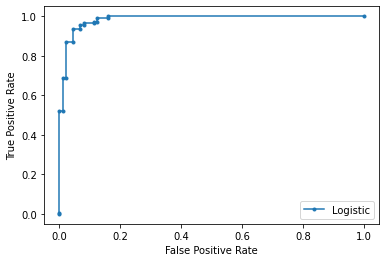

In [ ]:

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#PR Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


Logistic: f1=0.954 auc=0.989


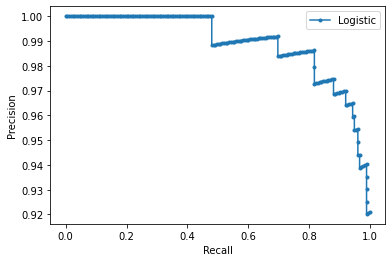

In [ ]:
yhat = model.predict(testX) #predicting labels (yhat) from test data
lr_precision, lr_recall, thresholds = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curve
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()